In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist
from scipy.special import comb
import sklearn.cluster as cluster

## Google Stock Price data

### Train data

In [15]:
data_train = pd.read_csv('..\data\Google_Stock_Price_Train.csv')

In [17]:
data_train.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [19]:
training_set = data_train.iloc[:,1:2].values

In [20]:
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)

In [21]:
x_train = []
y_train = []
for i in range(60, len(data_train)):
    x_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [22]:
x_train.shape

(1198, 60, 1)

### RNN

In [23]:
x_train.shape[1]

60

In [ ]:
#initiaizing RNN
regressor = tf.keras.models.Sequential()
regressor.add(tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
regressor.add(tf.keras.layers.Dropout(0.2))
regressor.add(tf.keras.layers.LSTM(units=50, return_sequences=True))
regressor.add(tf.keras.layers.Dropout(0.2))
regressor.add(tf.keras.layers.LSTM(units=50, return_sequences=True))
regressor.add(tf.keras.layers.Dropout(0.2))
regressor.add(tf.keras.layers.LSTM(units=50))
regressor.add(tf.keras.layers.Dropout(0.2))
regressor.add(tf.keras.layers.Dense(units=1))
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
regressor.fit(x_train, y_train, epochs=100, batch_size=32)

### Test data

In [ ]:
data_test = pd.read_csv('Google_Stock_Price_Test.csv')

In [ ]:
real_stock_price = data_test.iloc[:,1:2].values

In [ ]:
len(data_test)

20

### Prediction

In [ ]:
dataset_total = pd.concat((data_train['Open'], data_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(data_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60, 80):
    x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

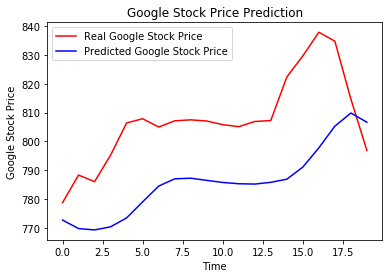

In [ ]:
plt.plot(real_stock_price, color='r', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='b', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [ ]:
## COVID-19 data

In [ ]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
s=requests.get(url).content
data = pd.read_csv(url)

In [ ]:
data.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,133,133,133,133,135,135,136,136,136,136
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,11,11,11,11,13,13,13,14,14,14
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,788,897,903,923,974,1043,1068,1118,1213,1252
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,51,51,51,51,51,51,51,53,53,53


In [ ]:
data = data[data['iso2'] == 'US']

In [ ]:
data_state = data.groupby('Province_State').sum().reset_index()

In [ ]:
data_state.head()

,Province_State,UID,code3,FIPS,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,...,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20
0,Alabama,5796241491,57960,241491.0,2203.246784,-5809.578199,0,0,0,0,...,3217,3563,3734,3953,4075,4345,4571,4712,4888,5079
1,Alaska,2604232344,26040,232344.0,1747.579877,-4229.319334,0,0,0,0,...,257,272,277,285,293,300,309,314,319,321
2,Arizona,1428230216,14280,230216.0,505.138555,-1671.948482,0,0,0,0,...,3393,3542,3705,3809,3964,4237,4511,4724,4933,5068
3,Arkansas,6468550635,64680,550635.0,2618.391704,-6932.548370,0,0,0,0,...,1228,1280,1410,1498,1569,1620,1695,1744,1781,1973
4,California,5040521376,50400,521376.0,2194.949775,-7002.258461,0,0,0,0,...,21706,22795,23931,25356,26686,27677,29157,30491,31431,33686


In [ ]:
data_deltas = pd.DataFrame(data_state['Province_State'])
for i in range(7,len(data_state.columns)):     #check index with df form
    data_deltas[data_state.columns[i]] = data_state[data_state.columns[i]] - data_state[data_state.columns[i-1]]

In [ ]:
data_deltas.head()

,Province_State,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20
0,Alabama,0,0,0,0,0,0,0,0,0,...,270,346,171,219,122,270,226,141,176,191
1,Alaska,0,0,0,0,0,0,0,0,0,...,11,15,5,8,8,7,9,5,5,2
2,Arizona,0,0,0,1,0,0,0,0,0,...,281,149,163,104,155,273,274,213,209,135
3,Arkansas,0,0,0,0,0,0,0,0,0,...,57,52,130,88,71,51,75,49,37,192
4,California,0,0,0,2,0,0,0,0,1,...,625,1089,1136,1425,1330,991,1480,1334,940,2255


In [ ]:
training_covid = data_deltas.iloc[:,1:]

In [ ]:
sc1 = MinMaxScaler()
training_covid_scaled = sc1.fit_transform(training_covid)

In [ ]:
training_covid.head()

,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,...,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20
0,0,0,0,0,0,0,0,0,0,0,...,270,346,171,219,122,270,226,141,176,191
1,0,0,0,0,0,0,0,0,0,0,...,11,15,5,8,8,7,9,5,5,2
2,0,0,0,1,0,0,0,0,0,0,...,281,149,163,104,155,273,274,213,209,135
3,0,0,0,0,0,0,0,0,0,0,...,57,52,130,88,71,51,75,49,37,192
4,0,0,0,2,0,0,0,0,1,0,...,625,1089,1136,1425,1330,991,1480,1334,940,2255


In [ ]:
def build_model(rnn_units, in_shape, out_size, dropout_prob=0):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(units=rnn_units, input_shape=in_shape))
    model.add(tf.keras.layers.Dropout(dropout_prob))
    model.add(tf.keras.layers.Dense(units=out_size))
    model.add(tf.keras.layers.Dropout(dropout_prob))
    model.compile(optimizer='adam', loss='mean_squared_error')

    return model

In [ ]:
model = build_model(rnn_units=50, in_shape=(training_covid.shape[1]-1, 1), out_size=1, dropout_prob=0.2)

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
_________________________________________________________________
dropout_3 (Dropout)          (None, 1)                 0         
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train = np.array(training_covid.iloc[:,:-1]).reshape(training_covid.shape[0], training_covid.shape[1]-1, 1)
y_train = np.array(training_covid.iloc[:,-1])

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=20, verbose=0)

### Clustering

In [ ]:
df_pop = pd.read_excel('population_states.xlsx')

In [ ]:
df_pop.head()

,State,Population
0,.Alabama,4903185
1,.Alaska,731545
2,.Arizona,7278717
3,.Arkansas,3017804
4,.California,39512223


In [ ]:
df_pop['Province_State'] = [i[1:] for i in df_pop['State']]

In [ ]:
del df_pop['State']

In [ ]:
data_pop = data_state.join(df_pop.set_index('Province_State'), on='Province_State', how='left')

In [ ]:
data_pop = data_pop[data_pop['Population'].isnull() == False]

In [ ]:
data_clust = data_pop[['Province_State', 'Population', '1/29/20','2/10/20','3/7/20','3/17/20','3/28/20','4/18/20']]

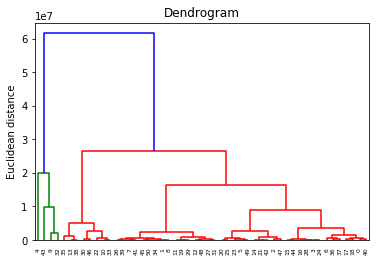

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(data_clust.iloc[:,1:], method='ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()

In [ ]:
z = sch.ward(pdist(data_clust.iloc[:,1:]))

In [ ]:
a = sch.fcluster(z, t=1, criterion='distance')
b = sch.fcluster(z, t=0.5, criterion='distance')
a == b

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [ ]:
clustering = cluster.AgglomerativeClustering().fit(data_clust[['3/4/20','3/11/20','3/18/20','3/25/20','4/1/20']])